In [1]:
import pylab as plt
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import math
import astropy.io.fits as fits
from astropy.table import Table 

In [2]:
df=Table(fits.getdata ('/Users/mgkadrmas/research/SMCquery2.fits.gz'))

In [3]:
##### Center values
#ra=13
#dec=-73
#rad=0.5

In [4]:
gd=np.where(np.isfinite(df['bp_rp']) & np.isfinite(df['phot_g_mean_mag']))

In [5]:
def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

In [7]:
fig = plt.figure()
plt.hist2d(df['bp_rp'][gd],df['phot_g_mean_mag'][gd],(200,200), norm=mpl.colors.LogNorm())
plt.ylim([21,10])
fig.canvas.mpl_connect('button_press_event', onclick)
#%matplotlib qt

6

single click: button=1, x=270, y=111, xdata=0.463849, ydata=19.267857
single click: button=1, x=287, y=141, xdata=0.712431, ydata=18.375000
single click: button=1, x=308, y=172, xdata=1.019504, ydata=17.452381
single click: button=1, x=338, y=225, xdata=1.458179, ydata=15.875000
single click: button=1, x=366, y=244, xdata=1.867609, ydata=15.309524
single click: button=1, x=413, y=245, xdata=2.554867, ydata=15.279762
single click: button=1, x=457, y=225, xdata=3.198257, ydata=15.875000
single click: button=1, x=429, y=205, xdata=2.788827, ydata=16.470238
single click: button=1, x=380, y=210, xdata=2.072324, ydata=16.321429
single click: button=1, x=359, y=186, xdata=1.765252, ydata=17.035714
single click: button=1, x=337, y=145, xdata=1.443557, ydata=18.255952
single click: button=1, x=324, y=107, xdata=1.253464, ydata=19.386905
single click: button=1, x=306, y=79, xdata=0.990259, ydata=20.220238
single click: button=1, x=288, y=72, xdata=0.727054, ydata=20.428571
single click: button=1

In [8]:
def roi_cut(xcut,ycut,x,y):
    """
    xcut : numpy array
         Array of x-values for the cut
    ycut : numpy array
         Array of y-values for the cut
    x : numpy array or list
         Array of x-values that should be cut
    y : numpy array or list
         Array of y-values that should be cut

    Returns
    ind : numpy array
       The indices of values OUTSIDE the cut
    cutind : 
       The indices of values INSIDE the cut

    """

    from matplotlib.path import Path
    tupVerts = list(zip(xcut,ycut))
    points = np.vstack((x,y)).T
    p = Path(tupVerts) # make a polygon
    inside = p.contains_points(points)
    ind, = np.where(~inside)
    cutind, = np.where(inside)

    return ind, cutind
    print (ind, cutind)



In [10]:
xcut=[0.463849,0.712431,1.019504,1.458179,1.867609,2.554867,3.198257,2.788827,2.072324,1.765252,1.443557,1.253464,0.990259,0.727054,0.478471]
ycut=[19.267857,18.375000,17.452381,15.875000,15.309524,15.279762,15.875000,16.470238,16.321429,17.035714,18.255952,19.386905,20.220238,20.428571,19.595238]
x=df['bp_rp']
y=df['phot_g_mean_mag']

(ind, cutind) = roi_cut(xcut,ycut,x,y)


(21, 13)

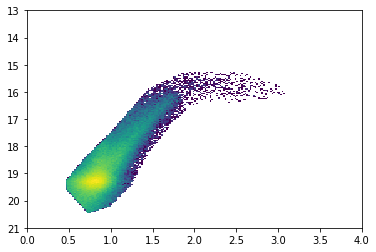

In [18]:
fig = plt.figure()
plt.hist2d(df['bp_rp'][cutind],df['phot_g_mean_mag'][cutind],(200,200), [[0,4],[13,21]],norm=mpl.colors.LogNorm())
plt.ylim([21,13])